<b> Описание проекта </b>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель** нашего исследования - выявить закономерности, которые определяют успешность игры.
это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Откроем файл с данными и изучим общую информацию.

Подготовим данные.

Проведём исследовательский анализ данных:
 - Посмотрим, сколько игр выпускалось в разные годы.
 - Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Выясним, за какой характерный срок появляются новые и исчезают старые платформы.
 - Взяв данные за актуальный период, посмотрим, какие платформы лидируют по продажам, растут или падают продажи.
 - Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам.
 - Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. построим диаграмму рассеивания и посчитаем корреляцию между отзывами и продажами.
 - Соотнесем выводы с продажами игр на других платформах.
 - Посмотрим на общее распределение игр по жанрам.
 - Составим портрет пользователя каждого региона, для них выявим самые популярные платформы (топ-5), опишем различия в долях. Для каждого региона выявим популярные жанры (топ-5). Выявим, влияет ли рейтинг ESRB на продажи в отдельном регионе.
 - Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 - Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.
 
 Напишем общий вывод.

Дополняю информацией о нашем датафрэйме

Name — название игры Platform — платформа Year_of_Release — год выпуска Genre — жанр игры NA_sales — продажи в Северной Америке (миллионы проданных копий) EU_sales — продажи в Европе (миллионы проданных копий) JP_sales — продажи в Японии (миллионы проданных копий) Other_sales — продажи в других странах (миллионы проданных копий) Critic_Score — оценка критиков (максимум 100) User_Score — оценка пользователей (максимум 10) Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. (описание данных)

Расшифруем обозначения рейтинга игр: «EC» («Early childhood») — «Для детей младшего возраста» «E» («Everyone») — «Для всех» «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет «RP» («Rating Pending») — «Рейтинг ожидается» «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»

## Шаг

### Откроем файл с данными и изучим общую информацию

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings; warnings.filterwarnings(action='once')
import pylab

In [3]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-info">
<b> На данном шаге видим, что в нашей базе 16715 строк. Есть пропущенные значения, о наличии дубликатов и неверных типов данных пока говорить рано, т.к. еще не видим, чем заполнена база. Посмотрим на таблицу.
    </b> 
</div>

In [4]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Для более удобной работы с таблицей, приведем все символы в наименовании столбцов и наименовании игр, платформ, жанра и рейтинга к нижнему регистру.

Год и оценки критиков преобразуем в целочисленный тип.

Выбросы и аномалии пока не выявлены

## Шаг.  Подготовим данные:
- Заменим названия столбцов (приведем к нижнему регистру)
- Преобразуем данные в нужные типы
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельны столбец

In [5]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating'] = data['rating'].str.lower()
data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изменим тип данных в столбцах - 'year_of_release' т.к. он лучше читается в целочисленном виде

In [9]:
#data[['year_of_release', 'rating']] = data[['year_of_release', 'rating']].astype()
data['year_of_release'] = data['year_of_release'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Посмотрим в каких столбцах есть пропуски - всего 16715 строк. 
Видим пропуски в:
- Имени (name) - их 2 шт - без имени информация по игре нам ничего ценного не даст - эти строки удалим.
- Год выхода (year_of_release) - заполним их нулями
- Жанр игры (genre) - их тоже 2шт - удалим
- Оценка критиков (critic_score) - достаточно много игр еще не оценены критиками - возможно это свежие игры, которые еще не успели оценить - с этими пропусками ничего не будет делать.
- Оценка пользователей (user_score) - по той же логике, что и с оценкой критиков - все данные оставим неизменными
- Рейтинг (rating) - аналогично - не трогаем


In [10]:
data = data.dropna(subset = ['name'])
data = data.dropna(subset = ['genre'])
data.isnull().sum(axis=0).sort_values()

name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
year_of_release     269
user_score         6699
rating             6764
critic_score       8576
dtype: int64

In [11]:
data['year_of_release'] = data['year_of_release'].fillna(0)
data.isnull().sum(axis=0).sort_values()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
user_score         6699
rating             6764
critic_score       8576
dtype: int64

Обращаем внимание на аббревеатуру "tdb" в столбце с оценкой пользователей. посмотрим, какие еще оценки записаны

In [12]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Благодаря поисковикам находим информацию по геймерским сокращениям - To Be Determined, то есть «Будет определено». Значит рейтинг еще не определен, значит можем заменить на пустое значение. И изменить тип на флот

In [13]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Приведём тип данных в столбце оценок критиков к целочисленному типу, с помощью метода to_numeric

In [16]:
data['critic_score'] = pd.to_numeric(data['critic_score'], errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [17]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

<div class="alert alert-info">
<b> Проверим уникальные значения в столбцах с названием игр, платформ и жанров</b> 
</div>

In [18]:
print(data['name'].unique())
print(data['platform'].unique())
print(data['genre'].unique())
print(data['rating'].unique())

['wii sports' 'super mario bros.' 'mario kart wii' ...
 'woody woodpecker in crazy castle 5' 'lma manager 2007'
 'haitaka no psychedelica']
['wii' 'nes' 'gb' 'ds' 'x360' 'ps3' 'ps2' 'snes' 'gba' 'ps4' '3ds' 'n64'
 'ps' 'xb' 'pc' '2600' 'psp' 'xone' 'wiiu' 'gc' 'gen' 'dc' 'psv' 'sat'
 'scd' 'ws' 'ng' 'tg16' '3do' 'gg' 'pcfx']
['sports' 'platform' 'racing' 'role-playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy']
['e' nan 'm' 't' 'e10+' 'k-a' 'ao' 'ec' 'rp']


Визуально не видим повторяющиеся значения в столбцах, но возможно есть целые строки, с одной и той-же игрой, вышедшей на одной и той же платформе и под тем же жанром, в том же году, будем считать такие строки дубликатами.

In [19]:
duplicateRows = data[data.duplicated (['name', 'platform', 'year_of_release', 'genre'], keep=False)]
duplicateRows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83.0,5.5,e
16230,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83.0,5.5,e


Видим, что есть строчки, в которых одна и та же игра внесена несколько раз. удалим все дубликаты, кроме первой встречающейся строчки

In [25]:
data.drop_duplicates(subset=['name', 'platform', 'year_of_release', 'genre']).reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16707,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16708,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16709,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN



<div class="alert alert-info">
<b> Удалили 1 строчку с явным дубликатом. 

Далее, будем считать, что совпадения в наименовании игры, но вышедшей в разные годы/на разных платформах/ под разными жанрами - это разные игры, дупликатами их считать нельзя. </b> 
</div>

In [32]:
duplicateRows = data[data.duplicated ()]

duplicateRows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating



<div class="alert alert-info">
<b> Явных дубликатов не найдено </b> 
</div>

Посчитаем суммарные продажи по всем регионам (na_sales, eu_sales, jp_sales, other_sales) и запишем их в отдельный столбец total_sales

In [33]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


На данном этапе мы подготовили данные таблицы к дальнейшей работе. А именно: мы удалили строки с незаполненным названием игры и жанром игры; год выхода игры заполнили нулями; привели все значения ячеек к нижнему регистру, чтобы можно было осуществить поиск полных дубликатов; обнаружили и удалили совпадающие по названию/платформе/году выхода/жанру строчки.

Изменили представление значения года.
Значение tbd в столбце оценки пользователей объединим с пустыми и заменим на Unknoun позже.

## Шаг. Проведём исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. 

Проверим, важны ли данные за все периоды. Нам известно, что данные в таблице по играм, вышедшим до 2016.

In [34]:
data.year_of_release.value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: Int64

Видим, что до 1994 года выходило крайне мало игр. построим график выхода новых игр, начиная с 1994г

<AxesSubplot:title={'center':'График выхода новых игр'}, xlabel='year_of_release'>

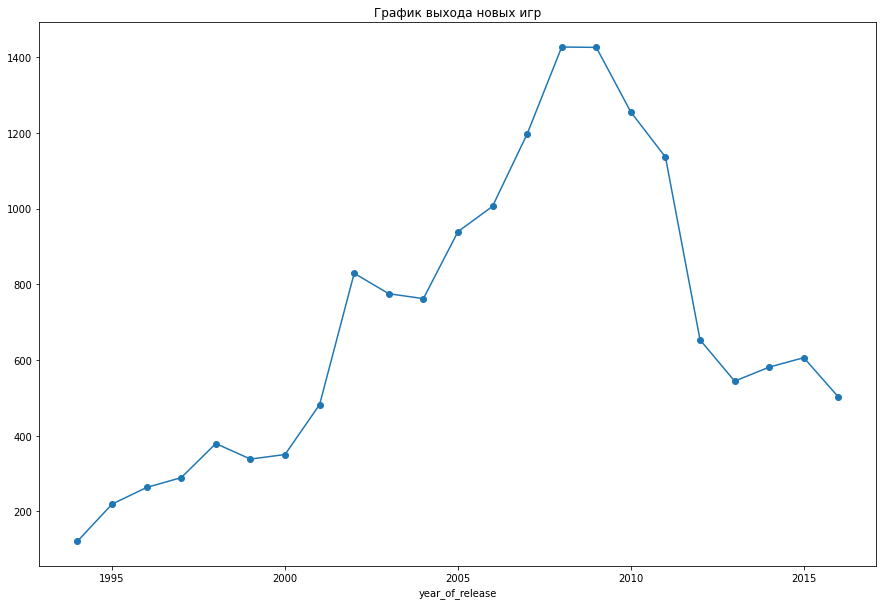

In [35]:
games_data = data[(data['year_of_release'] >= 1994)].copy()
games_data.groupby('year_of_release')['name'].count().plot(x="year_of_release" ,style="-o",figsize=(15,10),title='График выхода новых игр')

Видим пик продаж с 2004 до 2010г.
Посмотрим, в каком году был максимум продаж

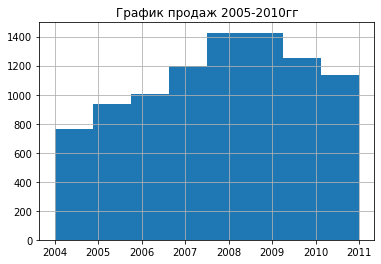

In [36]:
games_data['year_of_release'].hist(bins=8, range=(2004, 2011))
plt.title('График продаж 2005-2010гг')
plt.show()

Из графика видим, что максимум продаж наблюдался с середины 2007г и продолжился до начала 2009г.
Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами (total_sales) и построим распределение по годам. Посмотрим, за какой срок появляются новые и исчезают старые платформы.

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

Посмотрим, сколько всего платформ

In [37]:
print(data['platform'].unique())

len(data['platform'].unique())

['wii' 'nes' 'gb' 'ds' 'x360' 'ps3' 'ps2' 'snes' 'gba' 'ps4' '3ds' 'n64'
 'ps' 'xb' 'pc' '2600' 'psp' 'xone' 'wiiu' 'gc' 'gen' 'dc' 'psv' 'sat'
 'scd' 'ws' 'ng' 'tg16' '3do' 'gg' 'pcfx']


31

Посмотрим сводную таблицу по суммарным продажам по всем годам, по каждой платформе

In [38]:
data.groupby('platform').sum()['total_sales'].sort_values(ascending = False)


platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
ps       730.86
gba      317.85
ps4      314.14
psp      294.05
pc       259.52
3ds      259.00
xb       257.74
gb       255.46
nes      251.05
n64      218.68
snes     200.04
gc       198.93
xone     159.32
2600      96.98
wiiu      82.19
psv       54.07
sat       33.59
gen       28.35
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: total_sales, dtype: float64

Видим, что самыми "продаваемыми" платформами были первые 6 - PS2, X360, PS3, Wii, DS, PS.

In [39]:
top_platform = data.groupby('platform').sum()['total_sales'].sort_values(ascending = False).index.values[:6]
top_data = data[data.platform.isin(top_platform)]
top_data.head(12)



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e,28.32
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
11,mario kart ds,ds,2005,racing,9.71,7.47,4.13,1.90,91.0,8.6,e,23.21
13,wii fit,wii,2007,sports,8.92,8.03,3.60,2.15,80.0,7.7,e,22.70
14,kinect adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,61.0,6.3,e,21.82


(1994.0, 2017.0)

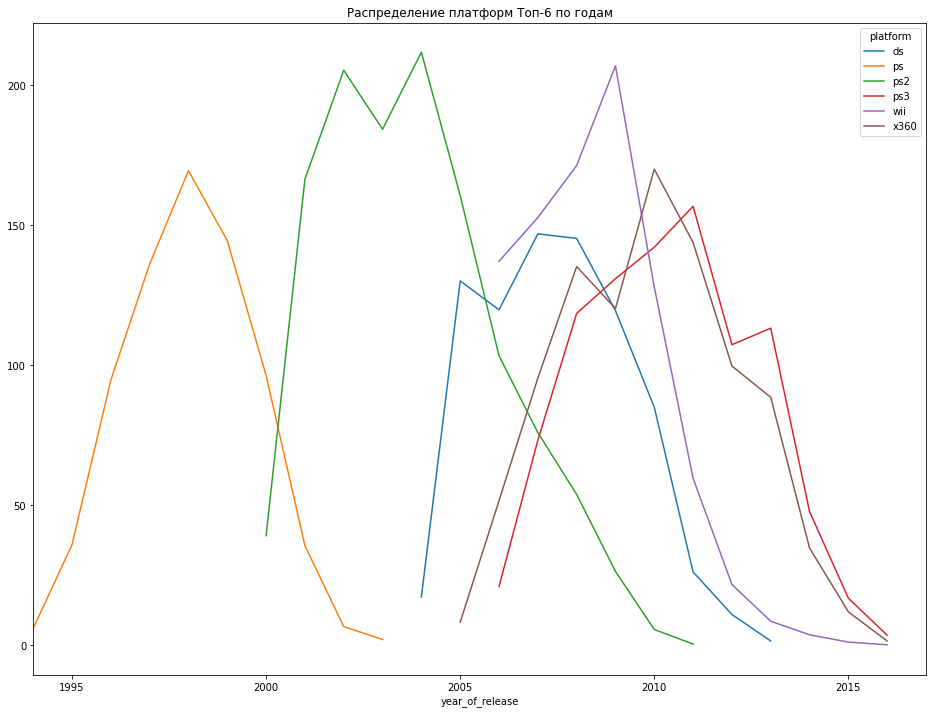

In [40]:
top_data = top_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
top_data.plot(figsize=(16,12), title='Распределение платформ Топ-6 по годам')
plt.xlim([1994,2017])

Среди платформ, у которых самые большие суммы продаж, можно выделить PS2 и Wii.

Для наглядности построем тепловую карту, в которой отразим год выхода и существования каждой платформы, начиная с 1994г

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

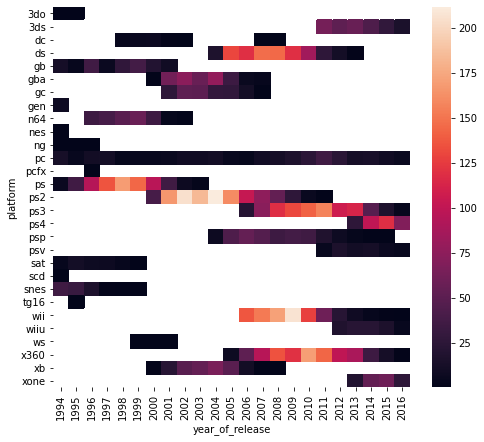

In [41]:
data_plat=games_data.pivot_table(index="platform",columns='year_of_release',values='total_sales',aggfunc=('sum'))
plt.figure(figsize=(8,7))
sns.heatmap(data_plat)

Изучая тепловую карту, видим что последние 3 года идёт большой спад в продажах по всем платформам. Из всех платформ, на последний год в базе, существует 10 платформ. Однако, лучше всех дела идут у PS4 и XOne. Примерный срок существования плтаформы - 7-10 лет, но есть и долгожители, в лице PC

### Возьмем данные за соответсвующий актульный период, чтобы построить прогноз на 2017г

Для построения прогноза на 2017год, возьмём данные по платформам за период 2014-2016гг. Вдруг появились платформы, которые только вышли на рынок и еще не попали в наш топ-6, но уже показывают хороший рост


### Отберём данные от 2014г и выше

In [42]:
aktual_data = data[(data['year_of_release'] >= 2014)].copy()
aktual_data['platform'].unique()


array(['ps4', '3ds', 'xone', 'wiiu', 'ps3', 'x360', 'pc', 'wii', 'psv',
       'psp'], dtype=object)

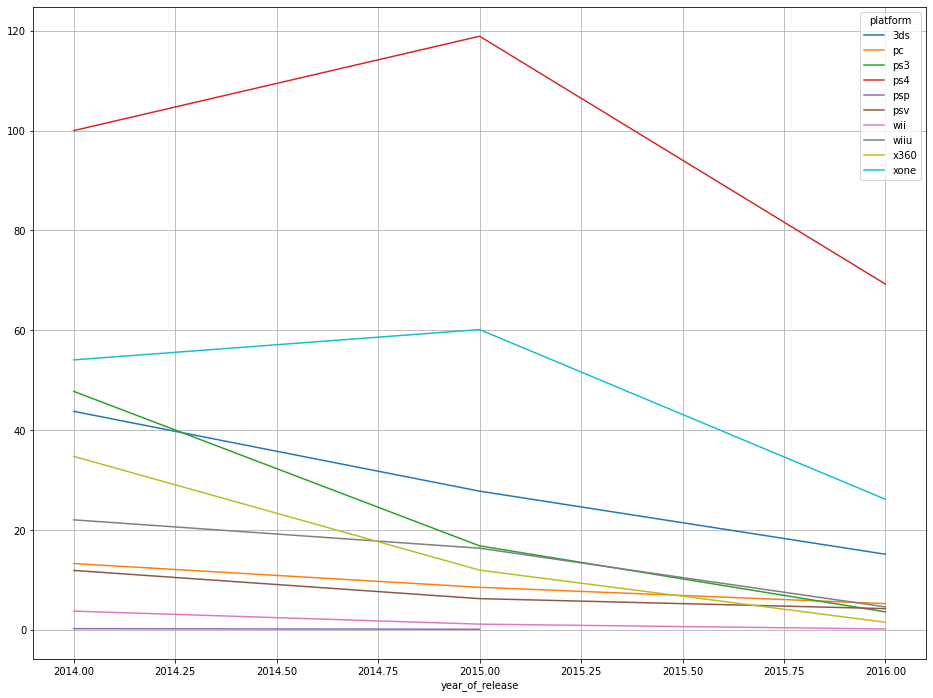

In [43]:
aktual_data.pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(grid=True, figsize=(16,12))
plt.show()

### Выберем несколько потенциально прибыльных платформ.

По графику видим спад продаж (который отражается и на всех предыдущих графиках). Но можем выделить 3 платформы с максимальными объемами продаж - PS4, XOne, 3DS, можно определить их, как потенциально прибилые платформы.

### Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам

Text(0, 0.5, 'Глобальные продажи')

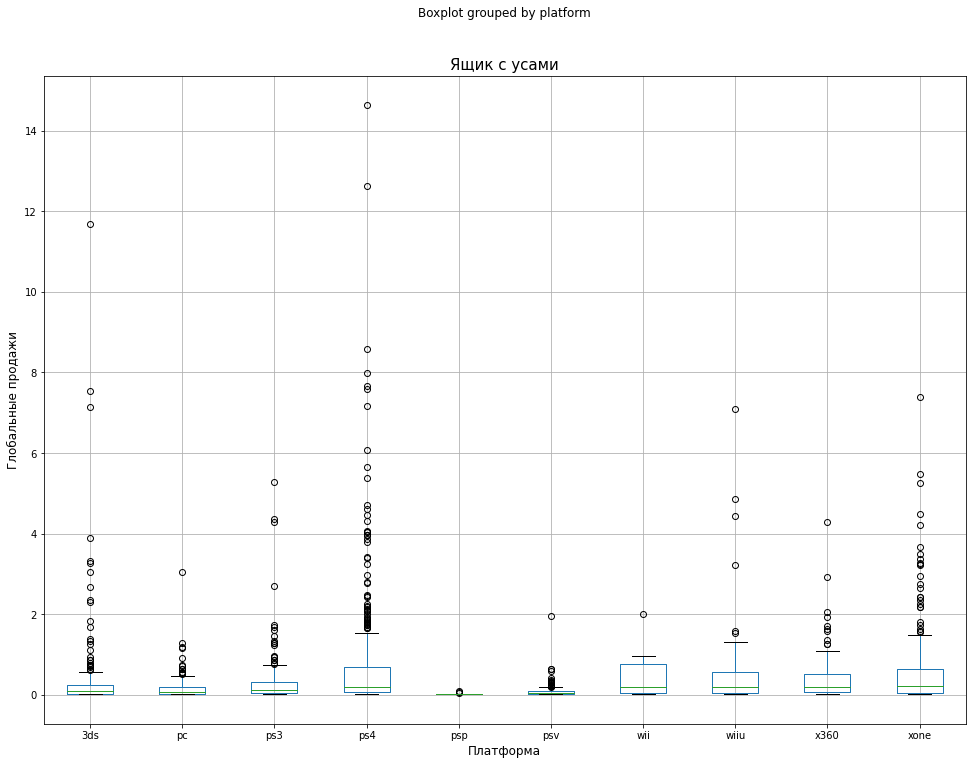

In [44]:
aktual_data.boxplot(by='platform', column='total_sales', figsize=(16,12))
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

По граифкам видим лидеров по продажам - PS4, XOne, 3DS, WiiU. 
На основе данных по платформе, с самыми большим объемом продаж - PS4 

Чтобы посмотреть график "ближе", определим, где находится верхняя граница, по которой можно ограничить его, не потряв основную информацию.
Из предыдущего графика видно, что большинство значений находится в интервале продаж до 6млн, будем считать это максимальным значением для нового графика.
Построим график только для лидеров продаж.

In [45]:
aktual_data_top = aktual_data.query("platform == ['ps4', 'xone', '3ds', 'wiiu']")

In [46]:
aktual_data_top['total_sales'].describe()

count    889.000000
mean       0.627863
std        1.358692
min        0.010000
25%        0.050000
50%        0.150000
75%        0.560000
max       14.630000
Name: total_sales, dtype: float64

(0.0, 6.0)

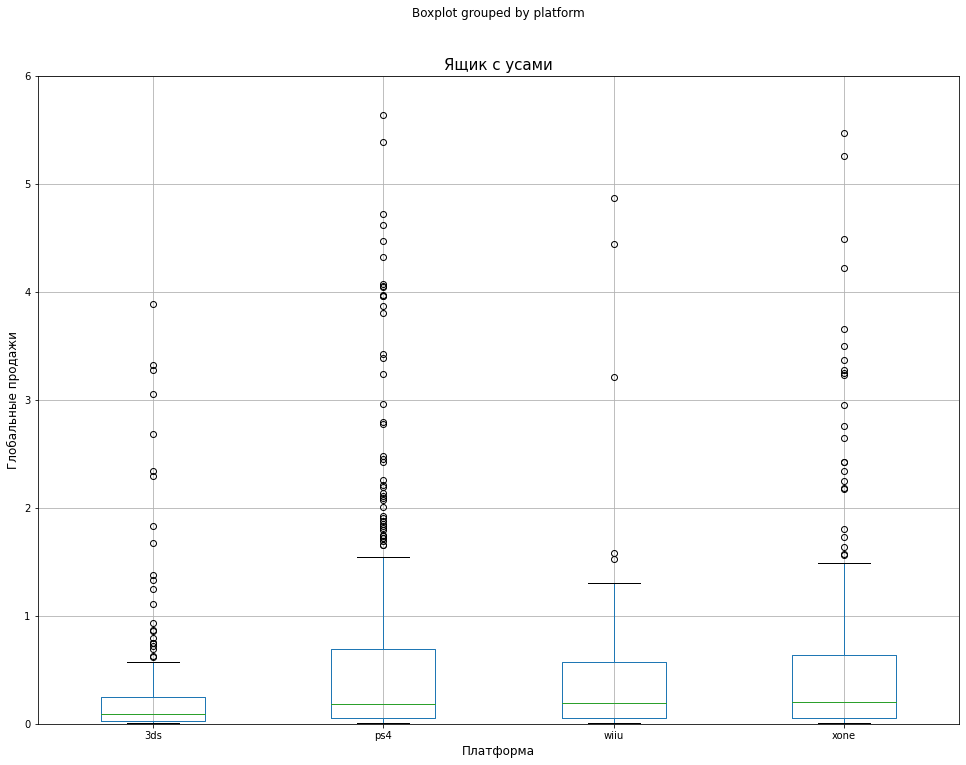

In [47]:
aktual_data_top.boxplot(by='platform', column='total_sales', figsize=(16,12))
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim([0,6])

Несмотря на то, что у платформы PS4 были продажи и свыше 6млн, медианное значение среди PS4, WiiU и XOne примерно одинаковое.
Но по третьему квантилю, очевидно, что у Платформы PS4 больший объем продаж.

### Посмотрим, как влияют на продажи отзывы покупателей и критиков.
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

<div class="alert alert-info">
<b> Построим диаграмму рассеивания и посчитаем корреляцию между отзывами критиков и объемом продаж</b> 
</div>

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

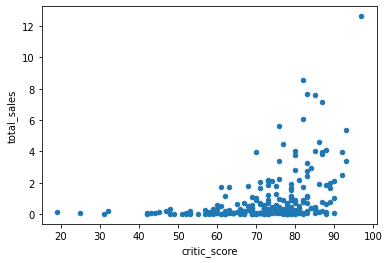

In [48]:
data_ps4 = aktual_data.query('platform == "ps4"')
data_ps4.plot(x='critic_score', y='total_sales', kind='scatter')

По диаграмме наблюдаем большое количество продаж, при оценках критиков более 70. Посчитаем корреляцию между отзывами и продажами.

In [49]:
corr_ps4 = data_ps4[['critic_score', 'total_sales']]
corr_ps4.corr()

,critic_score,total_sales
critic_score,1.000000,0.402661
total_sales,0.402661,1.000000


Коэффициент корреляции умеренноположительный - значит можем говорить о наличии связи, между оценками критиков и объема продаж.

<div class="alert alert-info">
<b> Построим диаграмму рассеивания и посчитаем корреляцию между отзывами пользователей и объемом продаж</b> 
</div>

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

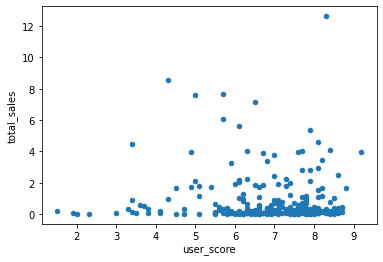

In [50]:
data_ps4 = aktual_data.query('platform == "ps4"')
data_ps4.plot(x='user_score', y='total_sales', kind='scatter')

In [51]:
corr_ps4 = data_ps4[['user_score', 'total_sales']]
corr_ps4.corr()

,user_score,total_sales
user_score,1.000000,-0.040132
total_sales,-0.040132,1.000000


Изучая значение корреляции можно сделать вывод, что нет зависимости продаж от оценок пользователей. Значит, что пользователи платформы PS4 в основном опираются на мнение критиков, а мнение пользователей не берут во внимание.

### Соотнесем эти выводы с продажами игр на других платформах (XOne, 3DS, WiiU)

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

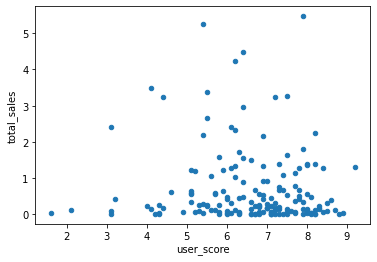

In [52]:
data_xone = aktual_data.query('platform == "xone"')
data_xone.plot(x='user_score', y='total_sales', kind='scatter')

In [53]:
corr_xone = data_xone[['user_score', 'total_sales']]
corr_xone.corr()

,user_score,total_sales
user_score,1.000000,-0.070384
total_sales,-0.070384,1.000000


По диаграмме и корреляции видим, что пользователи платформы XOne, при покупке игр не берут во внимание оценки пользователей.

Посмотрим на связь объема продаж и оценки критиков по этой же платформе

AxesSubplot(0.125,0.125;0.775x0.755)
              critic_score  total_sales
critic_score      1.000000     0.428677
total_sales       0.428677     1.000000


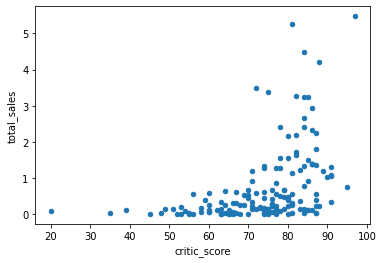

In [54]:
data_xone = aktual_data.query('platform == "xone"')
print(data_xone.plot(x='critic_score', y='total_sales', kind='scatter'))

corr_xone = data_xone[['critic_score', 'total_sales']]
print(corr_xone.corr())

Исходя из среднеположительного значения корреляции и визуального "узкого разброса" по продажам в области оценок выше 70 - видим прямую линейную зависимость объема продаж от оценок критиков на платформе XOne.

Проверим тоже-самое для платформы 3DS

AxesSubplot(0.125,0.125;0.775x0.755)
              critic_score  total_sales
critic_score      1.000000     0.314117
total_sales       0.314117     1.000000


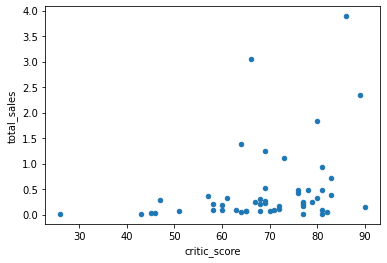

In [55]:
data_3ds = aktual_data.query('platform == "3ds"')
print(data_3ds.plot(x='critic_score', y='total_sales', kind='scatter'))

corr_3ds = data_3ds[['critic_score', 'total_sales']]
print(corr_3ds.corr())

Связь между объемом продаж и оценок критиков на платформе 3DS немного ниже, чем в уже рассмотренных платформах, но всё же есть.
Проверим на наличие связи между объемом продаж и оценками пользователей.

AxesSubplot(0.125,0.125;0.775x0.755)
             user_score  total_sales
user_score     1.000000     0.215193
total_sales    0.215193     1.000000


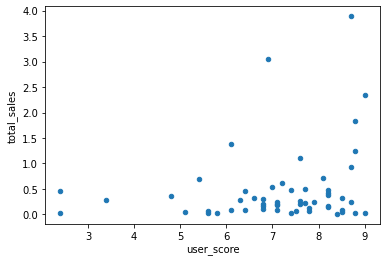

In [56]:
data_3ds = aktual_data.query('platform == "3ds"')
print(data_3ds.plot(x='user_score', y='total_sales', kind='scatter'))

corr_3ds = data_3ds[['user_score', 'total_sales']]
print(corr_3ds.corr())

Отмечу наличие связи между оценками пользователей и объемом продаж. НАдо признать, что пользователи платформы 3DS доверяют мнению друг друга больше, чем пользователи других платформ, изученных выше.

Посмотрим связи по платформе WiiU аналогичным способом.

AxesSubplot(0.125,0.125;0.775x0.755)
              critic_score  total_sales
critic_score      1.000000     0.370201
total_sales       0.370201     1.000000
AxesSubplot(0.125,0.125;0.775x0.755)
             user_score  total_sales
user_score     1.000000     0.407926
total_sales    0.407926     1.000000


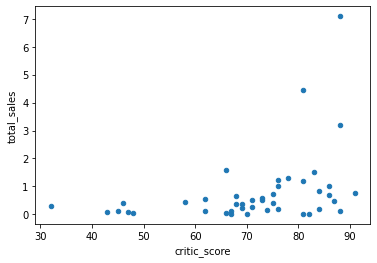

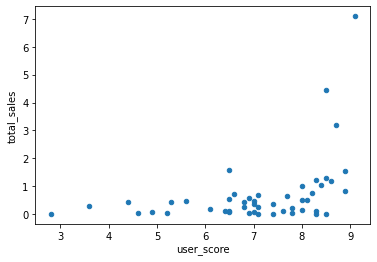

In [57]:
data_wiiu = aktual_data.query('platform == "wiiu"')
print(data_wiiu.plot(x='critic_score', y='total_sales', kind='scatter'))

corr_wiiu = data_wiiu[['critic_score', 'total_sales']]
print(corr_wiiu.corr())

data_wiiu = aktual_data.query('platform == "wiiu"')
print(data_wiiu.plot(x='user_score', y='total_sales', kind='scatter'))

corr_wiiu = data_wiiu[['user_score', 'total_sales']]
print(corr_wiiu.corr())

Первый график у нас отражает связь между оценками критиков и объемом продаж, на площадке WiiU, второй график отражает связь между оценками пользователей и объемом продаж. Они между собой очень похожи, так же, как и коэффициенты корреляции - и оба показывают среднеположительную зависимость объема продаж от оценок критиков и оценок пользователей.

По этой таблице наблюдаем прямую связь между оценками пользователей и продажей игр, и между оценками критикой и продажей игр

Можно сделать общий вывод - пользователи, при покупке игры, у той или иной платформы, в основном прислушиваются к мнению критиков, хотя, глядя на корреляцию по платформе WiiU - можно сделать вывод, что пользователи прислушиваются больше к оценке других пользователей.

<div class="alert alert-info">
<b> Обновляю вывод: у исследуемых нами 4х платформ обнаружили прямые зависимости объема продаж от оценок критиков.
    Но, у платформ PS4 и XOne  не выявили зависимость объема продаж от оценок пользователей - это говорит о большем доверии к критикам, среди пользователей этих платформ. 
    Для платформ 3DS и WiiU выявили зависимость объема продаж от оценок пользователей.</b> 
</div>

### Посмотрим на общее распределение по жанрам.
Найдем самые прибыльные жанры.
Проверим, выделяются ли жанры с высокими и низкими продажами.

Создадим круговую диаграмму

array([<AxesSubplot:ylabel='total_sales'>], dtype=object)

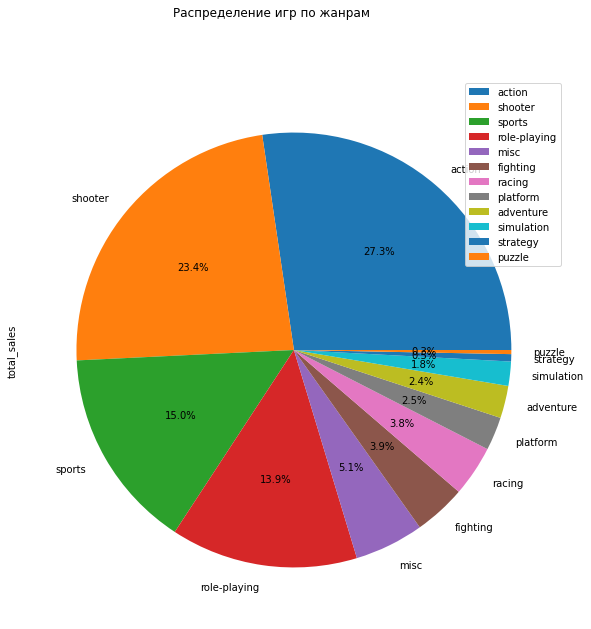

In [58]:
labels = ['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc', 'Fighting', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Strategy', 'Puzzle	']
genre_data = aktual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by='total_sales').rename_axis(None, axis=1)
genre_data.plot(kind='pie', subplots=True, figsize=(25,10), autopct='%1.1f%%', title='Распределение игр по жанрам')

Наглядно видим, что самыми популярными жанрами являются - Shooter, Action, Sports и Role-Playing

In [59]:
genre_data = aktual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by='total_sales').rename_axis(None, axis=1)
genre_data

,total_sales
genre,
action,199.36
shooter,170.94
sports,109.48
role-playing,101.44
misc,37.55
fighting,28.22
racing,27.52
platform,18.09
adventure,17.55


Остальные жанры отстают по суммарным продажам

In [60]:
genre_data = data.groupby('genre').median()['total_sales'].sort_values(ascending=False)
genre_data

genre
platform        0.27
shooter         0.24
sports          0.22
fighting        0.21
action          0.19
racing          0.19
role-playing    0.18
misc            0.16
simulation      0.15
puzzle          0.11
strategy        0.10
adventure       0.05
Name: total_sales, dtype: float64

(0.0, 2.0)

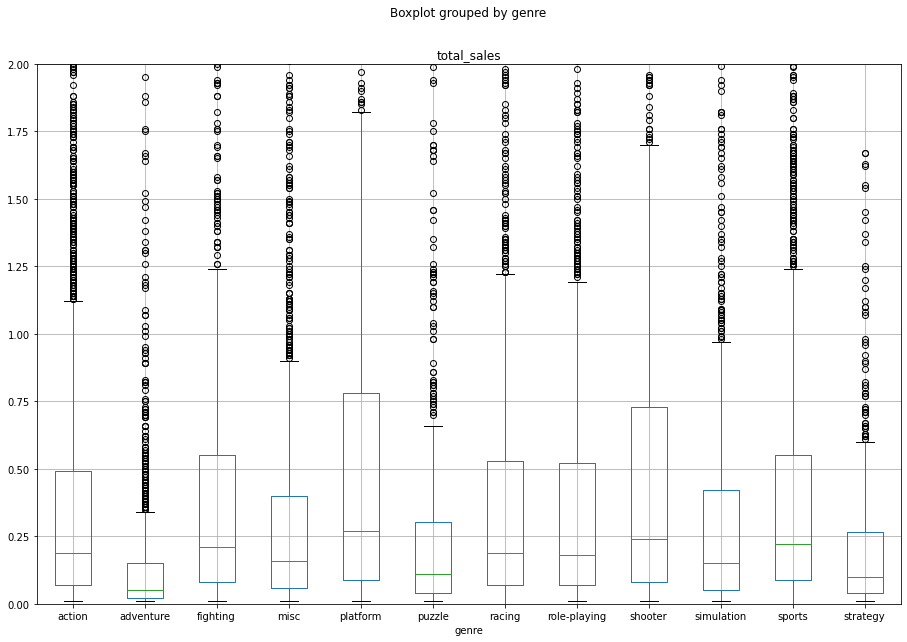

In [61]:
data.boxplot(by='genre', column='total_sales', figsize=(15,10))
plt.ylim(0,2)

По сводной таблице и диаграмме размаха наблюдаем наиболее прибыльные жанры по медианным значениям общих продаж - можем выделить Platform, Shooter, Sports.
Наглядно стали заметны различия, в выборе рассчетов для отбора прибыльных жанров - при распределии по общей сумме продаж у нас были другие платформы в топах, но т.к. на общую сумму могли повлиять единичные "выстрелы" игр.
По сводной таблице можем отметить большую разницу среди медианных значений в объемах продаж среди топовых жанров и жанров с самыми низкими объемами продаж таких жанров, как Adventure.

Проверим какие прибыльные жанры в выбранном нами актуальном периоде

(0.0, 1.75)

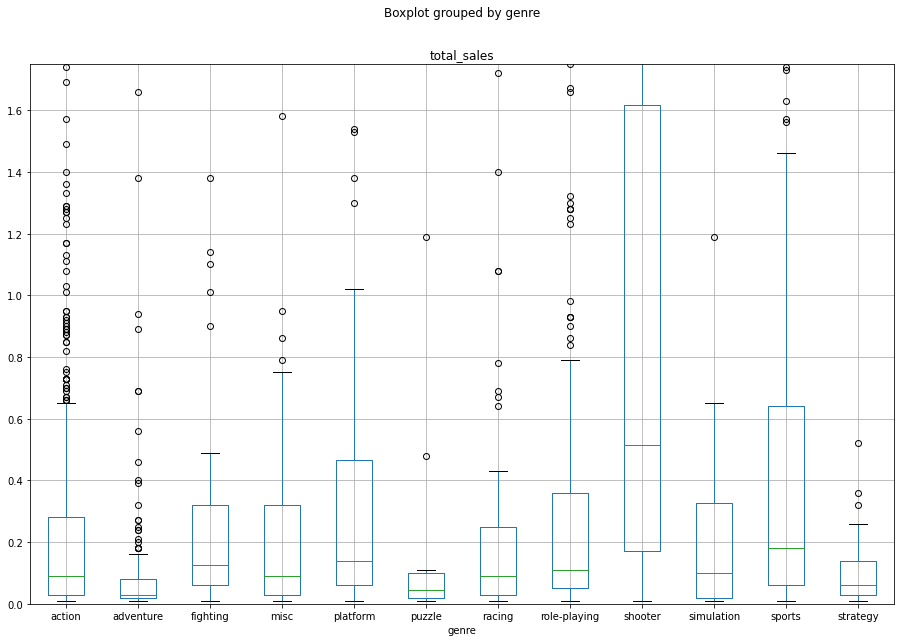

In [64]:

aktual_data.boxplot(by='genre', column='total_sales', figsize=(15,10))
plt.ylim(0,1.75)

<div class="alert alert-info">
<b> По данной диаграмме размаха в актуальном периоде, наблюдаем лидирующий жанр Shooter, его медианное значение гораздо выше, чем медианы остальных жанров</b> 
</div>

## Составьте портрет каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу
- Выявим, влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Построим график, для каждого региона, что-бы отразить популярность той, или иной платформы.
Данные о популярности берем за актуальный период.

In [47]:
data_platform = aktual_data.pivot_table(index = 'platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
data_platform

,eu_sales,jp_sales,na_sales
platform,,,
3ds,16.12,44.24,22.64
pc,17.97,0.00,7.23
ps3,25.54,11.22,22.05
ps4,130.04,15.02,98.61
psp,0.00,0.36,0.00
psv,3.53,14.54,2.52
wii,2.59,0.00,2.08
wiiu,13.15,7.31,19.36
x360,15.49,0.08,28.30


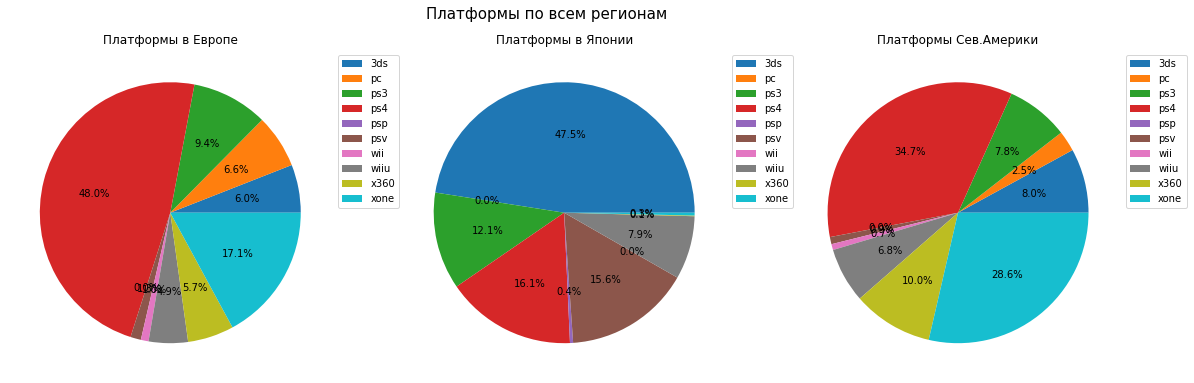

In [48]:
fig, ax = plt.subplots(1,3, figsize=(20,6))

fig.suptitle('Платформы по всем регионам', fontsize=15)
ax[0].pie(data_platform['eu_sales'], autopct='%1.1f%%')
ax[0].set(title = 'Платформы в Европе')
ax[0].legend(data_platform.index, bbox_to_anchor=(1, 0, 1, 1), loc='upper left')

ax[1].pie(data_platform['jp_sales'],  autopct='%1.1f%%')
ax[1].set(title='Платформы в Японии')
ax[1].legend(data_platform.index, bbox_to_anchor=(1, 0, 1, 1), loc='upper left')

ax[2].pie(data_platform['na_sales'],  autopct='%1.1f%%')
ax[2].set(title='Платформы Сев.Америки')
ax[2].legend(data_platform.index, bbox_to_anchor=(1, 0, 1, 1), loc='upper left')

Изучая графики, можем выделить по топ-5 платформ, для каждого из исследуемых регионов.

На рынке Европы популярны платформы:
1. PS4 - 48%
2. XOne - 17.1%
3. PS3 - 9.4%
4. PC - 6.6%
5. 3DS - 6%.

На рынке Японии популярны платформы:
1. 3DS - 47.5%
2. PS4 - 16.1%
3. PSV - 15.6%
4. PS3 - 12.1%
5. WiiU - 7.9%

На рынке Северной Америки:
1. PS4 - 34.7%
2. XOne - 28.6%
3. X360 - 10%
4. 3DS - 8%
5. PS3 - 7.8%

<div class="alert alert-info">
<b>Для больше читаемости данных, изменим представление графиков на столбчатые диаграммы</b> 
</div>


<AxesSubplot:xlabel='platform'>

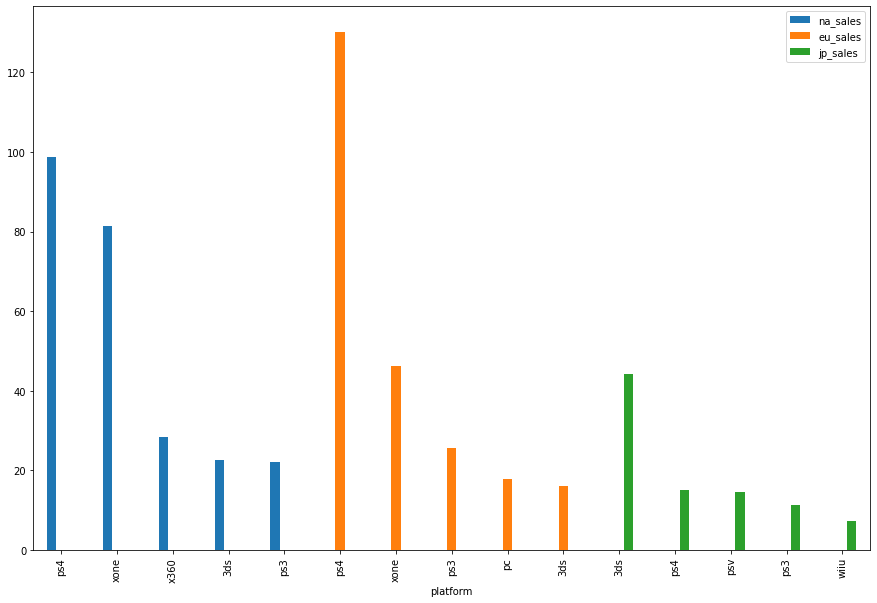

In [49]:
data_na = aktual_data.pivot_table(index = 'platform', values=['na_sales'], aggfunc = 'sum').sort_values(by='na_sales', ascending=False).head()
data_eu = aktual_data.pivot_table(index = 'platform', values=['eu_sales'], aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).head()
data_jp = aktual_data.pivot_table(index = 'platform', values=['jp_sales'], aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).head()

data_top_platform = pd.concat([data_na, data_eu, data_jp], axis=0)
data_top_platform
data_top_platform.plot(kind='bar', figsize=(15,10))

Благодаря процентному распределению по всем платформах на выбранных регионах - наглядно видим долю продаж топовых платформ, относительно всех продаваемых платформ (по регионам).
Можно сделать вывод, что PS4 входит в двойку лидеров по всем нашим регионам. XOne занимает второе место по популярности в Еровпе и Америке, а вот в Японии половину продаж по всему рынку занимает платформа 3DS.
Анализируя процентные соотнешения - можем сделать вывод, что в Северной Америке более жёсткая конкуренция между двумя лидерами на рынке, т.к. разрыв между ними чуть больше 5%

### Аналогичным способом посмотрим на самые популярные жанры

In [50]:
data_genre = aktual_data.pivot_table(index = 'genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
data_genre

,eu_sales,jp_sales,na_sales
genre,,,
action,74.68,29.58,72.53
adventure,6.49,3.60,5.64
fighting,6.69,6.37,12.43
misc,12.86,5.61,15.05
platform,6.80,2.69,6.79
puzzle,0.52,0.93,0.65
racing,14.13,1.76,8.74
role-playing,28.17,31.16,33.47
shooter,65.52,4.87,79.02


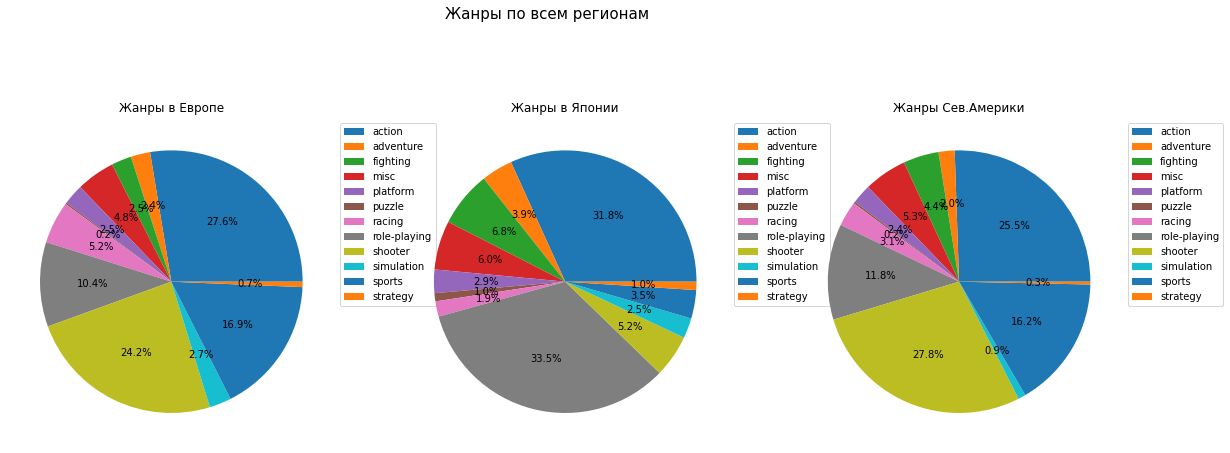

In [51]:
fig, ax = plt.subplots(1,3, figsize=(20,8))

fig.suptitle('Жанры по всем регионам', fontsize=15)
ax[0].pie(data_genre['eu_sales'], autopct='%1.1f%%')
ax[0].set(title = 'Жанры в Европе')
ax[0].legend(data_genre.index, bbox_to_anchor=(1, 0, 1, 1), loc='upper left')

ax[1].pie(data_genre['jp_sales'],  autopct='%1.1f%%')
ax[1].set(title='Жанры в Японии')
ax[1].legend(data_genre.index, bbox_to_anchor=(1, 0, 1, 1), loc='upper left')

ax[2].pie(data_genre['na_sales'],  autopct='%1.1f%%')
ax[2].set(title='Жанры Сев.Америки')
ax[2].legend(data_genre.index, bbox_to_anchor=(1, 0, 1, 1), loc='upper left')

Из данных графиков выделим топ-5 популярных жанров по каждому выбранному региону

Топ-5 жанров в Европе:
1. Action - 27.6%
2. Shooter -  24.2%
3. Sports - 16.9%
4. Role-Playing - 10.4%
5. Racing - 5.2%

Топ-5 жанров в Японии:
1. Role-Playing - 33.5%
2. Action - 31.8%
3. Fighting - 6.8%
4. Misc - 6%
5. Shooter -  5.2%

Топ-5 жанров в Северной Америке
1. Shooter - 27.8%
2. Action - 25.5%
3. Sports - 16.2%
4. Role-Playing - 11.8%
5. Misc - 5.3%

Можем сделать вывод, что во всех регионах популярен жанр Action. В Европе и Северной Америке также популярен жанр Shooter. И только в японии в топ-5 попал жанр Fighting (имитация рукопашного боя) - скорее всего, это связано с культурой в спорте, среди играющих жителей Японии. Также большую часть рынка в Японии занимают ролевые игры, тогда как в остальных регионах этот жанр (возможно) ещё, не столь популярен.

<div class="alert alert-info">
<b>Отразим топ-5 платформ по каждому региону на столбчатом графике</b> 
</div>

<AxesSubplot:xlabel='genre'>

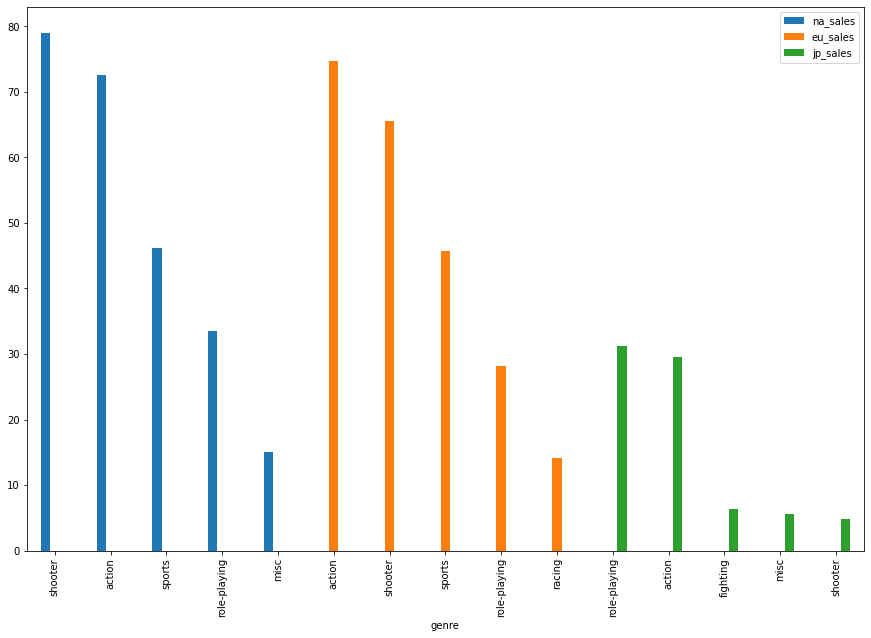

In [52]:
data_na = aktual_data.pivot_table(index = 'genre', values=['na_sales'], aggfunc = 'sum').sort_values(by='na_sales', ascending=False).head()
data_eu = aktual_data.pivot_table(index = 'genre', values=['eu_sales'], aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).head()
data_jp = aktual_data.pivot_table(index = 'genre', values=['jp_sales'], aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).head()

data_top_platform = pd.concat([data_na, data_eu, data_jp], axis=0)
data_top_platform
data_top_platform.plot(kind='bar', figsize=(15,10))

С помощью столбчатых диаграмм отследили распределение жанров, на Европейском, Американском и Японских игровых рынках. Интересно, что в Европе и Америке популярен жанр Shooter а в Японии он в конце нашего рейтинга.

### Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе.
Вспомним, что в начале исследования, мы выявили незаполненные ячейки со значением рейтинга. 

Вернёмся к исследованию значений в данном столбце

In [53]:
data.isnull().sum(axis=0).sort_values()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
total_sales           0
rating             6764
critic_score       8576
user_score         9123
dtype: int64

Видим, что в нужном столбце (rating) у нас 6764 пропуска. Посмотрим, какие уникальные значения есть в этом столбце

In [54]:
data['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

В данном столбце хранится информация о возрастных (допустимых) ограничениях, среди компьютерных игр. т.к. количество "безоценочных" игр велико - удалить игры с незаполненной инфой по этому стобцу - мы не можем. заменить какими-то средними или медианными значениями - тоже не возможно.
Значит все не заполненные значения мы можем отнести к группе "Не известны" (unknown или un)


In [55]:
data['rating'] = data['rating'].fillna('un')
data.isnull().sum(axis=0).sort_values()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
total_sales           0
critic_score       8576
user_score         9123
dtype: int64

In [56]:
data['rating'].unique()

array(['e', 'un', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

Посмортрим на зависимость продаж от рейтинга ESRB

<div class="alert alert-info">
<b>Построим 3 графика рядом, чтобы визуально определить зависимость объема продаж, от рейтинга ESRB</b> 
</div>


Text(0.5, 1.0, 'Зависимость продаж от рейтинга ESRB в Японии')

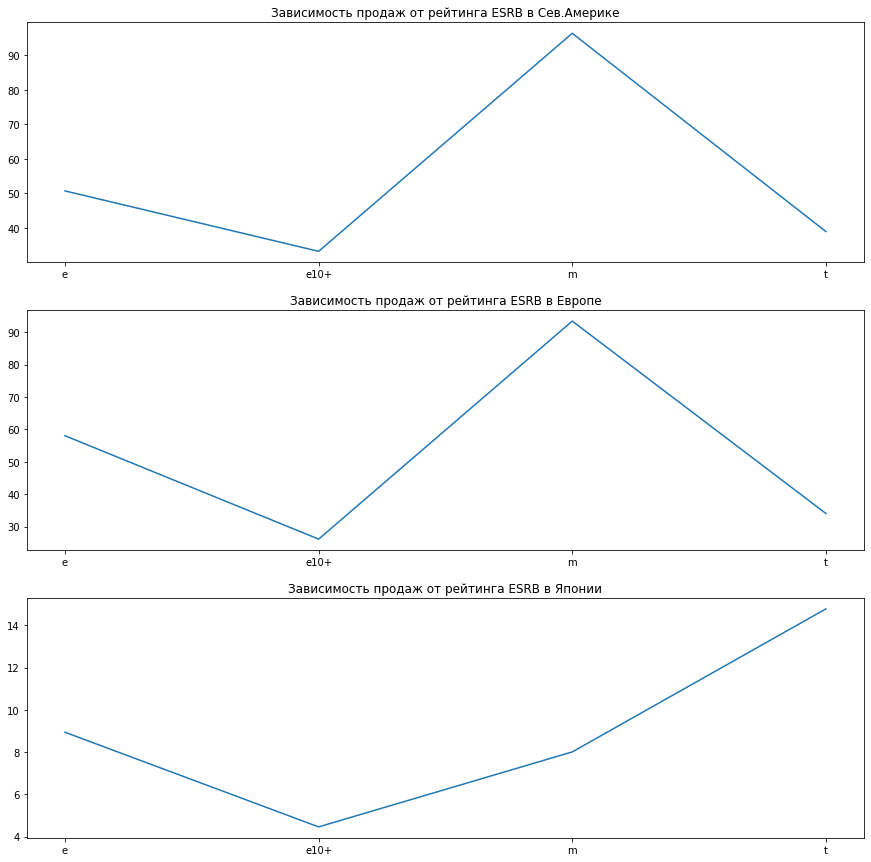

In [57]:
esrb_na = aktual_data.pivot_table(index = 'rating', values = ['na_sales'], aggfunc = 'sum')
esrb_eu = aktual_data.pivot_table(index = 'rating', values = ['eu_sales'], aggfunc = 'sum')
esrb_jp = aktual_data.pivot_table(index = 'rating', values = ['jp_sales'], aggfunc = 'sum')
fig, axs = plt.subplots(3,1, figsize=(15,15))
axs[0].plot(esrb_na)
axs[0].set_title("Зависимость продаж от рейтинга ESRB в Сев.Америке")

axs[1].plot(esrb_eu)
axs[1].set_title("Зависимость продаж от рейтинга ESRB в Европе")

axs[2].plot(esrb_jp)
axs[2].set_title("Зависимость продаж от рейтинга ESRB в Японии")

#esrb.plot(figsize=(10,6))

По графикафикам можем отметить, что в Европе и Северной Америке есть прямая зависимость объема продаж от возрастного рейтинга - игры с рейтингом "от 10 и старше" и "для подростков" продаются гораздо меньше, чем игры с пометкой "для взрослых" и "для всех".
В Японии ситуация немного другая - игры с пометкой "для всех" продаются средне, меньше всего продаются игры с пометкой "от 10 лет" и лучше всех продаётся категория "для подростков - от 13лет"

Подводя итог можем отметить, что игровая индустрия в Японии живёт отличной от других рассматриваемых нами регионов - у неё в лидерах свои платформы, свои жанры и свои возрастные рейтинги. Тогда как пользователи из Северной Америки и Европы предпочитают одни и те же (с разной долей) платформы, жанры игр и возрастные ограничения.
Можно сделать вывод, что основной возраст геймеров в Японии - это подростки, которые увлекаются единоборствами, а в других регионах - более старшие пользователи, которые увлекаются стрелялками и экшен-играми.

## Шаг. Проверка гипотез

Проверим две гипотезы :
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем гипотезу, чтобы проверить - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Допустим, средние пользовательские рейтинги на платформах равны - это нулевая гипотеза.

тогда альтернативная гипотеза будет звучать как "средние пользовательские рейтинги не равны"

H0: Средние пользовательские рейтинги платформы Xbox One и PC равны

Н1: Средние пользовательские рейтинги платформы Xbox One и PC не равны

In [58]:
XOne = aktual_data[(aktual_data['platform'] == 'xone') &  (aktual_data['user_score'] > 0)]['user_score']
PC = aktual_data[(aktual_data['platform'] == 'pc') &  (aktual_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.594545454545456
Средний пользовательский рейтинг платформы PC 6.298360655737705


Т.к. у нас 2 независимые выборки, и нам нужно проверить равенство средних этих выборок - применим t-test  с двумя выборками.
Альфу установим равной 5%

In [59]:
alpha = .05

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Можем сделать вывод, что первая гипотеза подтвердилась, а это значит, что можно считать средние пользовательские рейтинги платформ Xbox One и PC одинаковыми.

Сформулируем вторую гипотезу, чтобы проверить - средние пользовательские рейтинги жанров Action и Sports разные.

H0: Средние пользовательские рейтинги жанров Action и Sports не равны

Н1: Средние пользовательские рейтинги жанров Action и Sportsравны

Допустим, средние пользовательские рейтинги жанров Action и Sports одинаковые - это будет нулевой гипотезой, значит альтернативной будет - средние пользовательские рейтинги жанров Action и Sports разные.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Н1: Средние пользовательские рейтинги жанров Action и Sports разные

In [60]:
Action = aktual_data[(aktual_data['genre'] == 'action') &  (aktual_data['user_score'] > 0)]['user_score']
Sports = aktual_data[(aktual_data['genre'] == 'sports') &  (aktual_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.760606060606061
Средний пользовательский рейтинг жанра Sports 5.2251968503937


Т.к. у нас 2 независимые выборки, и нам нужно проверить равенство средних этих выборок - применим t-test  с двумя выборками.
Альфу установим равной 5%

In [61]:
alpha = .05

results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Результат проверки говорит о том, что нулевая гипотеза отвергается, а значит Средние пользовательские рейтинги жанров Action и Sports разные

## Общий вывод

В ходе исследования, нам стало известно, что максимум продаж наблюдался с середины 2007г и продолжился до начала 2009г.

Публиковать новые игры, для жителей Японии лучше на платформе 3DS. А для жителей Европы и Северной Америке - на платфлормах PS4 и XOne.

Проверили 2 гипотезы:  "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "средние пользовательские рейтинги жанров Action и Sports разные", в итоге нам удалось выяснить, что средние пользовательские рейтинги платформ Xbox One и PC действительно одинаковые, и средние пользовательские рейтинги жанров Action и Sports действительно разные.

На основании полученных данных за 2 последних года, можем сделать предположение, что самым популярным жанром в 2017г, скорее всего будут Action, Shooter, Role-Playing.

Лидировать по продажам будут игры, с возрастным рейтингом M (17+).

Для увеличения продаж, нужно добиться высоких оценок от критиков.

Можно предположить, что в 2017 году на первое место по Платформам может выйти PS4, т.к. она показывают свою текущую популярность во многих странах.